In [3]:
import danawa as dw

product_codes = {
    "SKHynix_DDR5-5600_16GB" : 18883523,
    "Samsung_DDR5-5600_16GB" : 18911780,
    "ESSENCORE_KLEVV_DDR5-5600_CL46_16GB" : 18965774,
    "TeamGroup_T-CREATE_DDR5-5600_CL46_Elite_16GB" : 17535839,
    "Samsung_DDR4-3200_16GB" : 11790199,
    "ESSENCORE_KLEVV_DDR4-3200_CL22_16GB" : 11787091,
    "Micron_Crucial_DDR4-3200_CL22_16GB" : 10294092
}

by_month=24

price_data = {}

for product_name, product_code in product_codes.items():
    try:
        price_variance = dw.get_price_variance(product_code, by_month=by_month)
        price_data[product_name] = price_variance["prices"]

        print(f"Fetched data for {product_name}: {price_variance}")
    except Exception as e:
        print(f"Error fetching data for {product_name} (code: {product_code}): {e}")

price_variance = dw.get_price_variance(product_code, by_month=24)
print(price_variance)


Fetched data for SKHynix_DDR5-5600_16GB: {'min': 60140, 'max': 87750, 'prices': [{'price': 87750, 'date': '23-04'}, {'price': 83360, 'date': '23-05'}, {'price': 82010, 'date': '23-06'}, {'price': 80330, 'date': '23-07'}, {'price': 79850, 'date': '23-08'}, {'price': 79560, 'date': '23-09'}, {'price': 78150, 'date': '23-10'}, {'price': 78500, 'date': '23-11'}, {'price': 68590, 'date': '23-12'}, {'price': 60140, 'date': '24-01'}, {'price': 61960, 'date': '24-02'}, {'price': 64520, 'date': '24-03'}, {'price': 64740, 'date': '24-04'}, {'price': 70060, 'date': '24-05'}, {'price': 72970, 'date': '24-06'}, {'price': 76720, 'date': '24-07'}, {'price': 81840, 'date': '24-08'}, {'price': 81700, 'date': '24-09'}, {'price': 76330, 'date': '24-10'}, {'price': 77170, 'date': '24-11'}, {'price': 82190, 'date': '24-12'}, {'price': 83060, 'date': '25-01'}, {'price': 83510, 'date': '25-02'}]}
Fetched data for Samsung_DDR5-5600_16GB: {'min': 43060, 'max': 68090, 'prices': [{'price': 68090, 'date': '23-04'

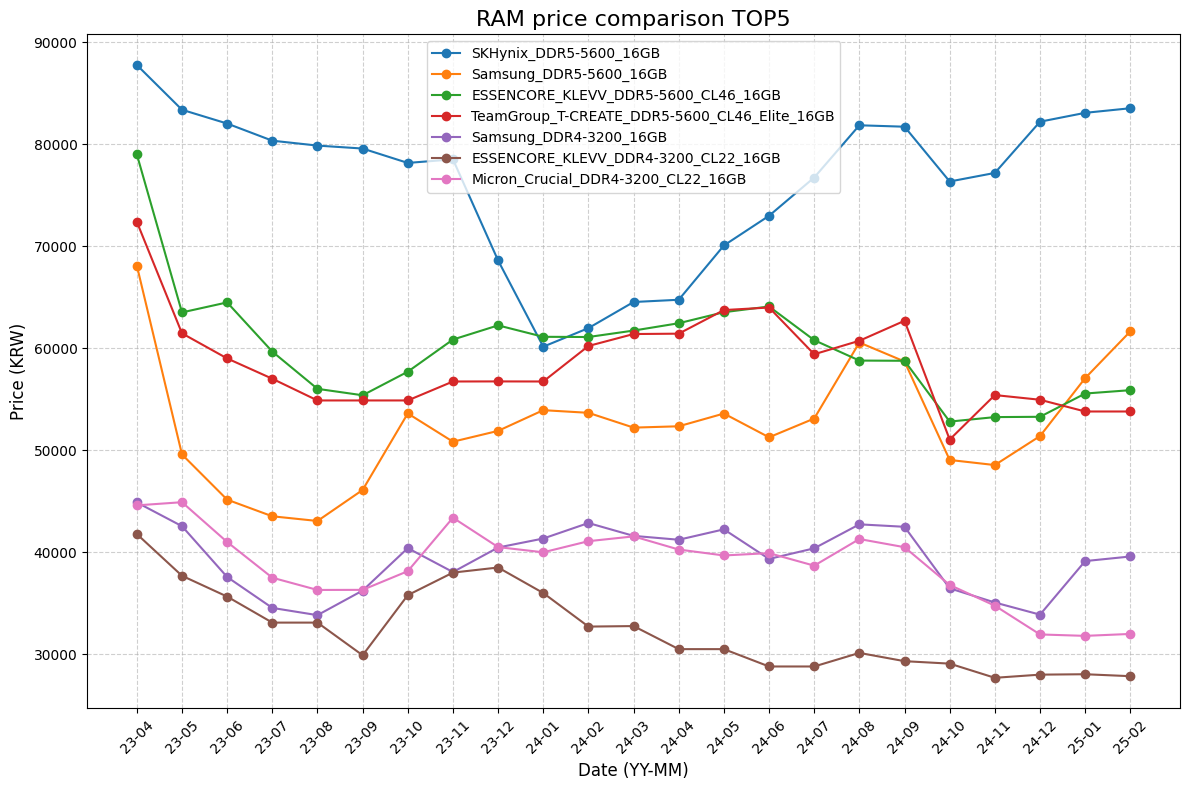

In [4]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12, 8))

for product_name, prices in price_data.items():
    # 날짜와 가격 데이터 추출
    dates = [entry["date"] for entry in prices]
    price_values = [entry["price"] for entry in prices]

    # 상품별로 그래프 추가
    plt.plot(dates, price_values, marker='o', label=product_name)

# 그래프 꾸미기
plt.title("RAM price comparison TOP5", fontsize=16)
plt.xlabel("Date (YY-MM)", fontsize=12)
plt.ylabel("Price (KRW)", fontsize=12)
plt.xticks(rotation=45)  # X축 날짜 라벨 회전
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 그래프 출력
plt.show()

In [16]:
from datetime import datetime

# 날짜 형식을 변환하는 함수
def convert_date_format(date_str):
    year, month = date_str.split('-')
    return f"20{year}-{month}-01"

# 변환 작업
ram_data_list = []

for ram_name, prices in price_data.items():
    updated_prices = []
    for price_data in prices:
        updated_prices.append({
            'price': price_data['price'],
            'date': convert_date_format(price_data['date'])  # 날짜 형식 변환
        })
    ram_data_list.append({'name': ram_name, 'prices': updated_prices})

# 결과 출력
print(ram_data_list)

[{'name': 'SKHynix_DDR5-5600_16GB', 'prices': [{'price': 87750, 'date': '2023-04-01'}, {'price': 83360, 'date': '2023-05-01'}, {'price': 82010, 'date': '2023-06-01'}, {'price': 80330, 'date': '2023-07-01'}, {'price': 79850, 'date': '2023-08-01'}, {'price': 79560, 'date': '2023-09-01'}, {'price': 78150, 'date': '2023-10-01'}, {'price': 78500, 'date': '2023-11-01'}, {'price': 68590, 'date': '2023-12-01'}, {'price': 60140, 'date': '2024-01-01'}, {'price': 61960, 'date': '2024-02-01'}, {'price': 64520, 'date': '2024-03-01'}, {'price': 64740, 'date': '2024-04-01'}, {'price': 70060, 'date': '2024-05-01'}, {'price': 72970, 'date': '2024-06-01'}, {'price': 76720, 'date': '2024-07-01'}, {'price': 81840, 'date': '2024-08-01'}, {'price': 81700, 'date': '2024-09-01'}, {'price': 76330, 'date': '2024-10-01'}, {'price': 77170, 'date': '2024-11-01'}, {'price': 82190, 'date': '2024-12-01'}, {'price': 83060, 'date': '2025-01-01'}, {'price': 83510, 'date': '2025-02-01'}]}, {'name': 'Samsung_DDR5-5600_16G

In [ ]:
import mysql.connector
from mysql.connector import Error

# MySQL 연결 설정
connection = mysql.connector.connect(
        host='192.168.0.163',
        port=3306,
        database='analysis',   # 데이터베이스 이름
        user='root',       # 사용자 이름
        password='andong1234'
    )

# 데이터 삽입 함수
def insert_ram_data(ram_name, prices):
    try:
        with connection.cursor() as cursor:

            query = "INSERT INTO stage_ram (ram_name, ram_price, ram_date) VALUES (%s, %s, %s)"
            for price_data in prices:
                cursor.execute(query, (ram_name, price_data['price'], price_data['date']))
        connection.commit()
        print(f"Data for {ram_name} inserted successfully.")
    except Exception as e:
        print(f"Error: {e}")
        connection.rollback()

for ram_data in ram_data_list:
    insert_ram_data(ram_data['name'], ram_data['prices'])

# 연결 종료
connection.close()

Data for SKHynix_DDR5-5600_16GB inserted successfully.
Data for Samsung_DDR5-5600_16GB inserted successfully.
Data for ESSENCORE_KLEVV_DDR5-5600_CL46_16GB inserted successfully.
Data for TeamGroup_T-CREATE_DDR5-5600_CL46_Elite_16GB inserted successfully.
Data for Samsung_DDR4-3200_16GB inserted successfully.
Data for ESSENCORE_KLEVV_DDR4-3200_CL22_16GB inserted successfully.
Data for Micron_Crucial_DDR4-3200_CL22_16GB inserted successfully.
